In [ ]:
import pandas as pd
import numpy as np
import re


In [ ]:
df = pd.read_csv("micromania.csv",sep=",")
df.head(5)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,8453,The Sims 3: Seasons,PC,2012.0,Simulation,Electronic Arts,0.00,0.13,0.00,0.03,0.17
1,6946,Sands of Destruction,DS,2008.0,Role-Playing,Sega,0.09,0.00,0.13,0.01,0.24
2,12672,Teenage Mutant Ninja Turtles II: Back from the...,GB,1991.0,Action,Konami Digital Entertainment,0.00,0.00,0.06,0.00,0.06
3,14382,Medabots 9: Metabee / Rokusho,3DS,2015.0,Role-Playing,Rocket Company,0.00,0.00,0.03,0.00,0.03
4,8671,Tiger Woods PGA Tour 2004,GC,2003.0,Sports,Electronic Arts,0.12,0.03,0.00,0.00,0.16


## Quelle est la meilleure plateforme, le meilleur genre et le meilleur jeu vidéo?


##La meilleure plateforme


In [ ]:
# Regrouper les ventes par plateforme et calculer les ventes globales pour chaque plateforme
ventes_par_plateforme = df.groupby('Platform')['Global_Sales'].sum()

# Identifier la plateforme avec les ventes les plus élevées
meilleure_plateforme = ventes_par_plateforme.idxmax()
ventes_max = ventes_par_plateforme.max()

print(f"La meilleure plateforme vidéo en termes de ventes est {meilleure_plateforme} avec un total de {ventes_max} ventes globales.")

La meilleure plateforme vidéo en termes de ventes est PS2 avec un total de 1255.64 ventes globales.


##meuilleur genre


In [ ]:
# Regrouper les ventes par genre et calculer les ventes globales pour chaque genre
ventes_par_genre = df.groupby('Genre')['Global_Sales'].sum()

# Identifier le genre  avec les ventes les plus élevées
meilleur_genre = ventes_par_genre.idxmax()
ventes_max = ventes_par_genre.max()

print(f"Le meilleur genre en termes de ventes est {meilleur_genre} avec un total de {ventes_max} ventes globales.")

Le meilleur genre en termes de ventes est Action avec un total de 1751.18 ventes globales.


##Le meuilleur jeu vidéo


In [ ]:
# Regrouper les ventes par jeux vidéos et calculer les ventes globales pour chaque jeu
ventes_par_jeu = df.groupby('Name')['Global_Sales'].sum()

# Identifier le jeu vidéo avec les ventes les plus élevées
meilleur_jeu = ventes_par_jeu.idxmax()
ventes_max = ventes_par_jeu.max()

print(f"Le meilleur jeu vidéo en termes de ventes est {meilleur_jeu} avec un total de {ventes_max} ventes globales.")

Le meilleur jeu vidéo en termes de ventes est Wii Sports avec un total de 82.74 ventes globales.


## À quelle année la vente de jeux a été la plus prolifique?

In [ ]:
# Regrouper les ventes par année et calculer les ventes globales pour chaque année
ventes_par_annee = df.groupby('Year')['Global_Sales'].sum()

# Identifier l'année avec le plus de ventes globales
annee_max_ventes = ventes_par_annee.idxmax()
ventes_max = ventes_par_annee.max()
print(f"L'année avec le plus de ventes est {annee_max_ventes} avec un total de {ventes_max} ventes globales.")

L'année avec le plus de ventes est 2008.0 avec un total de 678.9 ventes globales.


##Quelle est la région contribuant le plus aux ventes mondiales totales?

In [ ]:
# Calculer les ventes totales par région
ventes_totales_par_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# Identifier la région contribuant le plus aux ventes globales
region_max_ventes = ventes_totales_par_region.idxmax()
ventes_max = ventes_totales_par_region.max()

print(f"La région qui contribue le plus aux ventes globales est {region_max_ventes} avec un total de {ventes_max} ventes.")

La région qui contribue le plus aux ventes globales est NA_Sales avec un total de 4392.949999999999 ventes.


## Existe-t-il une corrélation entre les ventes en Amérique du Nord et en Europe pour les jeux?

In [ ]:

# Calcul de la corrélation entre les ventes en Amérique du Nord et en Europe
correlation = df['NA_Sales'].corr(df['EU_Sales'])

print(f"La corrélation entre les ventes en Amérique du Nord et en Europe est : {correlation}")

La corrélation entre les ventes en Amérique du Nord et en Europe est : 0.767726748370264


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-26-f1454947d606>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


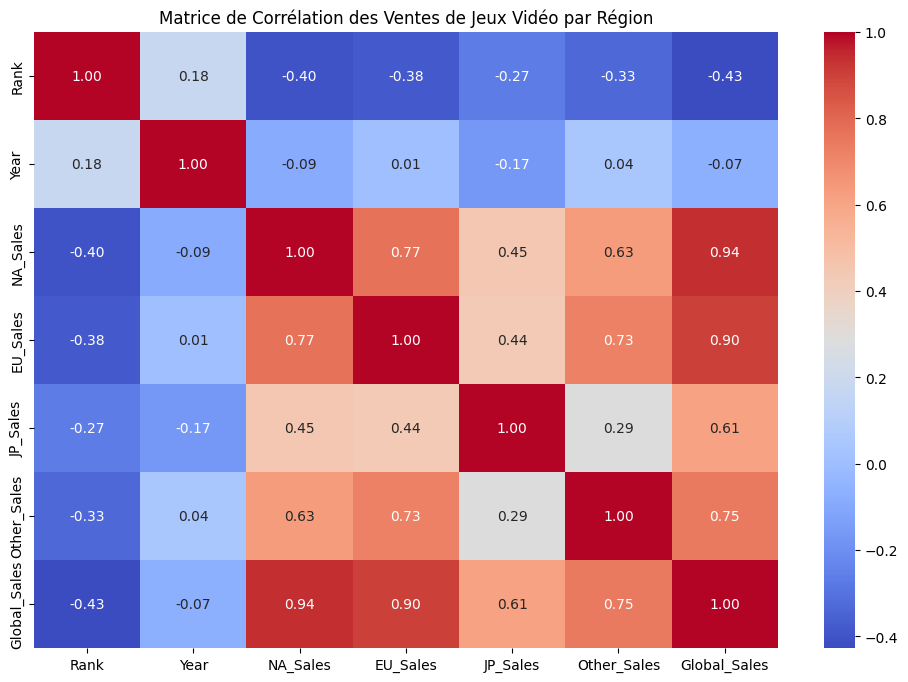

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher le graphique de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Corrélation des Ventes de Jeux Vidéo par Région")
plt.show()

Dans le contexte des ventes de jeux vidéo par région, une corrélation positive élevée entre les ventes en Amérique du Nord et les ventes en Europe, pourrait indiquer que les jeux qui se vendent bien en Amérique du Nord ont tendance à se vendre également bien en Amérique du Sud, et vice versa

## Les tendances de jeux au Japon



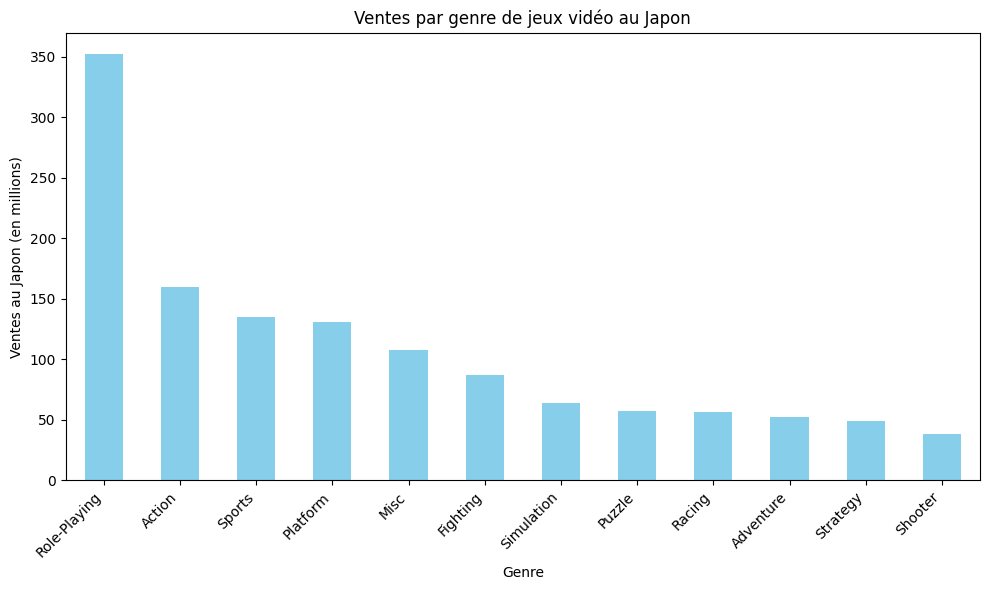

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà chargé vos données dans le DataFrame ventes_par_genre

# Calculer les ventes totales par genre au Japon
ventes_totales_par_genre = df.groupby('Genre')['JP_Sales'].sum().sort_values(ascending=False)

# Afficher un graphique barplot des ventes par genre au Japon
plt.figure(figsize=(10, 6))
ventes_totales_par_genre.plot(kind='bar', color='skyblue')
plt.title('Ventes par genre de jeux vidéo au Japon')
plt.xlabel('Genre')
plt.ylabel('Ventes au Japon (en millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()